# LR1

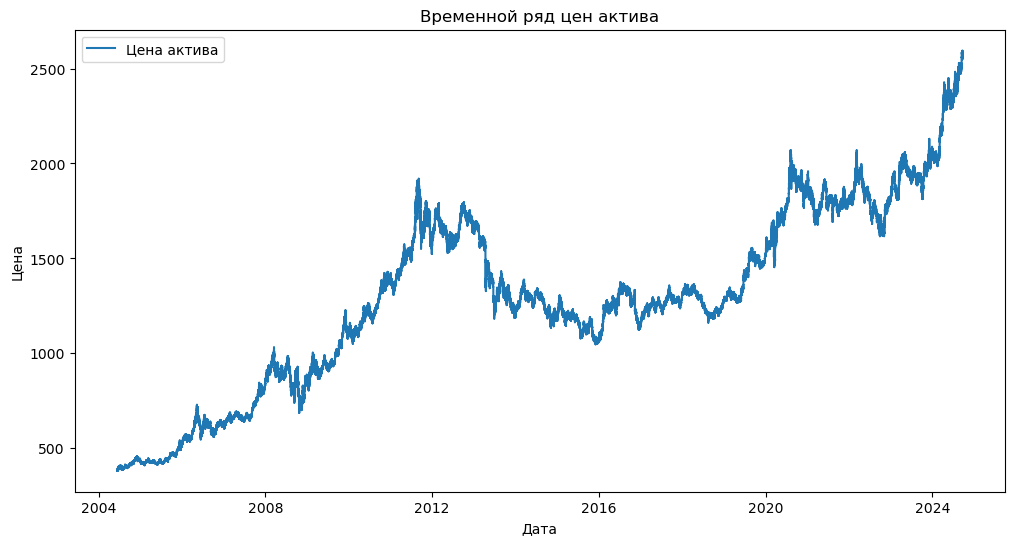

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Загрузка данных
data = pd.read_csv('XAU_15m_data_2004_to_2024-20-09.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Цена актива')
plt.title('Временной ряд цен актива')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

1. Рост актива с 2004 по 2011: С самого начала наблюдается уверенный рост цен с примерно 250 до пика в районе 1800 к 2011 году. Этот период характеризуется устойчивой восходящей тенденцией с временными колебаниями.

2. Коррекция в 2012-2016 годах: После достижения максимума, цена актива начинает снижаться, достигнув минимума около 1000 в 2015 году. Возможно, это связано с кризисами на рынках или экономическими событиями.

3. Стабилизация и волатильность с 2016 по 2020: В этот период цены восстанавливаются и показывают волатильность, оставаясь в диапазоне от 1000 до 1500.

4. Резкий рост после 2020 года: Начиная с 2020 года, наблюдается новый значительный подъем, который приводит к историческим максимумам, превышающим 2500 в 2024 году.

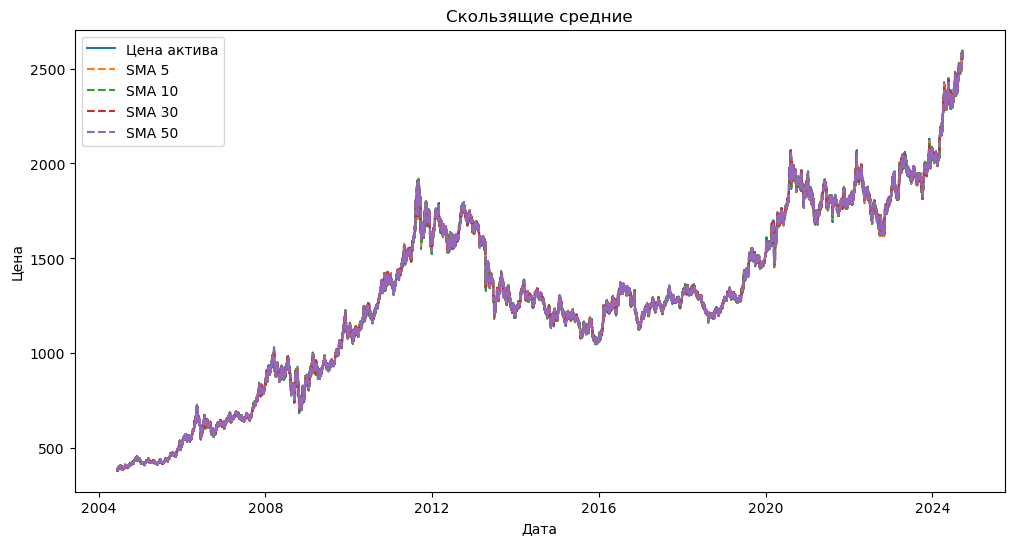

In [3]:
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Построение графика со скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Цена актива')
plt.plot(data['SMA_5'], label='SMA 5', linestyle='--')
plt.plot(data['SMA_10'], label='SMA 10', linestyle='--')
plt.plot(data['SMA_30'], label='SMA 30', linestyle='--')
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--')
plt.title('Скользящие средние')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

В текущей ситуации актив находится в восходящем тренде, который поддерживается и подтверждается скользящими средними всех периодов.
Ближайшие уровни SMA находятся очень близко к цене, что указывает на согласованность движения актива с его краткосрочными и долгосрочными тенденциями.

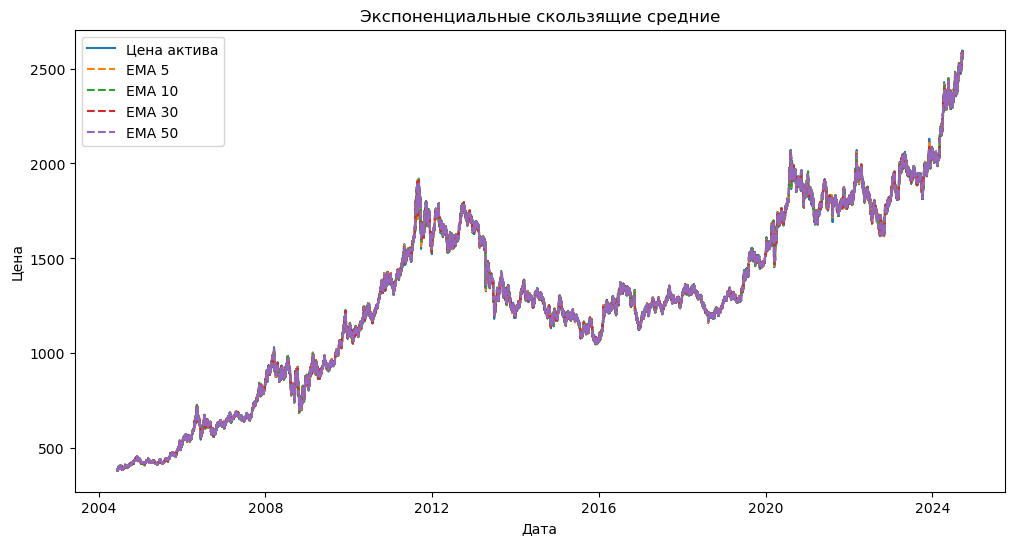

In [4]:
data['EMA_5'] = data['Close'].ewm(span=5, adjust=False).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA_30'] = data['Close'].ewm(span=30, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Построение графика с EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Цена актива')
plt.plot(data['EMA_5'], label='EMA 5', linestyle='--')
plt.plot(data['EMA_10'], label='EMA 10', linestyle='--')
plt.plot(data['EMA_30'], label='EMA 30', linestyle='--')
plt.plot(data['EMA_50'], label='EMA 50', linestyle='--')
plt.title('Экспоненциальные скользящие средние')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

Найдены дублирующие значения в индексе. Удаляем дубликаты.


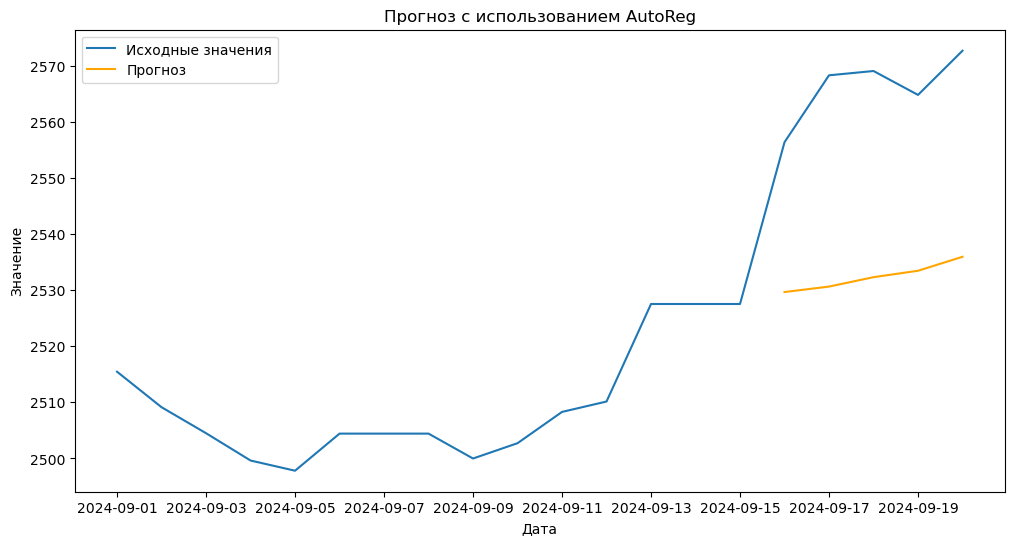

In [8]:
if data.index.duplicated().any():
    print("Найдены дублирующие значения в индексе. Удаляем дубликаты.")
    # Удаление дубликатов, оставляя первое вхождение
    data = data[~data.index.duplicated(keep='first')]

# Установка частоты на дневную
data = data.asfreq('D')

# Вычисление экспоненциального скользящего среднего (EMA)
ema = data["Close"].ewm(span=5).mean()

# Длина прогноза
forecast_len = 5

# Подгонка модели AutoReg
model = AutoReg(ema[:-forecast_len], lags=300).fit()
forecast = model.forecast(steps=forecast_len)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data.index[-forecast_len*4:], ema[-forecast_len*4:], label="Исходные значения")
plt.plot(data.index[-forecast_len:], forecast, label="Прогноз", color='orange')
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз с использованием AutoReg")
plt.legend()
plt.show()

### Прогнозирование на основе EMA 5

In [17]:
forecast_periods = 5

last_5_values = data["Close"].iloc[-5:]
last_ema = data['EMA_5'].iloc[-1]

alpha = 0.3

forecast_values = [last_ema]

### Расчет EMA на основе последних 5 дней

In [18]:
for value in last_5_values:
    next_ema = alpha * value + (1 - alpha) * forecast_values[-1]
    forecast_values.append(next_ema)

forecast_ema_5 = [forecast_values[-1]] * forecast_periods
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods)

### Построение графика прогноза

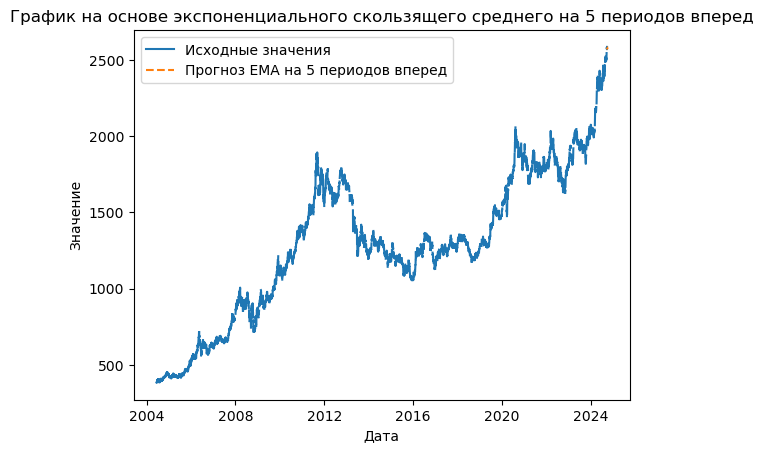

In [19]:
forecast_series = pd.Series(forecast_values[1:], index=forecast_dates)

plt.plot(data.index, data['EMA_5'], label="Исходные значения")
plt.plot(forecast_series.index, forecast_series.values, label="Прогноз EMA на 5 периодов вперед", linestyle="--")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График на основе экспоненциального скользящего среднего на 5 периодов вперед")
plt.legend()
plt.show()

### Вывод

1. Анализ временного ряда: Временной ряд может быть нестационарным и требовать дополнительных преобразований для анализа.
2. Скользящие средние: Позволяют сгладить данные и выявить тренды.
3. Экспоненциальные скользящие средние: Более чувствительны к последним изменениям цен по сравнению с простыми скользящими.
4. Прогнозирование: Прогнозы могут быть полезны для принятия инвестиционных решений, но требуют осторожности и учета рыночных условий.

Долгосрочный восходящий тренд: С 2004 по 2024 год цена актива демонстрирует устойчивый рост с периодами коррекции. Особо заметный рост наблюдается с 2020 года, когда цена преодолела исторические максимумы, достигнув более 2500 единиц в 2024 году.

Цикличность рынка: Временной ряд цен включает периоды роста (до 2011 года), коррекции (2012–2015 годы) и последующего восстановления (с 2016 года). Это указывает на типичное рыночное поведение, где чередуются бычьи и медвежьи циклы.

Подтверждение восходящего тренда через SMA: Анализ скользящих средних для различных периодов (5, 10, 30, 50 дней) показывает, что краткосрочные и долгосрочные тенденции синхронно следуют за ценой актива, указывая на продолжение восходящего тренда. Близость линий SMA к цене свидетельствует об отсутствии значительных краткосрочных колебаний, что подтверждает стабильный рост.

Перспективы дальнейшего роста: Отсутствие сигналов о пересечении краткосрочных и долгосрочных SMA указывает на вероятное продолжение роста актива. Текущая структура рынка выглядит благоприятной для инвесторов, однако необходимо учитывать внешние факторы, которые могут повлиять на динамику.